## Component 2: Interactive, Bespoke Visualization

In [74]:
#importing necessary Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.plotly as py
import plotly
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (8, 12)
#plotly.tools.set_credentials_file(username='niteeshkanungo', api_key='qGl6RQ1RJpS0IO2OK21Y')
%matplotlib inline
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()
import ipywidgets as widgets

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [75]:
#Reading the file with proper encoding
imls = pd.read_csv("DiscGrants96to13.csv", encoding = "ISO-8859-1")

In [76]:
imls.count()

LogNumber            13218
Institution          13218
Program              13218
ProgramType          13218
ProjectTitle          4178
ProjectType           8515
AwardDate            13207
InstAddr1            13197
InstAddr2             2002
InstAddr3               61
InstCity             13216
InstState            13216
InstZip              13191
AwardOrig            13218
AwardTotal           13218
AppMatchAmount       10020
ReqAwardAmount       13216
ReqMatchAmount       12720
Prefix               12532
FirstName            13218
LastName             13218
OrgType              12092
FiscalYear           13218
AwardPeriodFr            0
AwardPeriodTo            0
OrgUnit               1057
OUAddr1               1046
OUAddr2                279
OUAddr3                  6
OUCity                1052
OUState               1053
OUZip                 1046
Latitude             13200
Longitude            13200
FIPSState            13174
FIPSCounty           13174
CensusTract          13174
C

In [77]:
imls.head(5)

,LogNumber,Institution,Program,ProgramType,ProjectTitle,ProjectType,AwardDate,InstAddr1,InstAddr2,InstAddr3,...,Longitude,FIPSState,FIPSCounty,CensusTract,CensusBlock,FIPSMCDCode,FIPSPlaceCode,CBSACode,MetroDivisionCode,Description
0,IA-00-00-0001-00,Museum of the Aleutians,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 648,NaN,NaN,...,-166.536862,2.0,16.0,200.0,2014.0,1615.0,80770.0,NaN,NaN,NaN
1,IA-00-00-0002-00,"Depot Museum, Inc.",Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 681420,NaN,NaN,...,-85.694757,1.0,49.0,961000.0,2013.0,91206.0,27616.0,NaN,NaN,NaN
2,IA-00-00-0003-00,National Voting Rights Museum and Institute,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,6 Highway 80 East,NaN,NaN,...,-87.017024,1.0,47.0,957200.0,1005.0,92883.0,NaN,42820.0,NaN,NaN
3,IA-00-00-0004-00,Bob Jones Museum,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 613,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IA-00-00-0005-00,Coronado Museum of History and Art,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,1100 Orange Avenue,NaN,NaN,...,-117.170703,6.0,73.0,10900.0,1021.0,92780.0,16378.0,41740.0,NaN,NaN


In [78]:
imls.drop(["ProjectTitle",
           "ProjectType",
           "InstAddr1",
           "InstAddr2",
           "InstAddr3",
           "AwardPeriodFr",
           "AwardPeriodTo",
           "AwardPeriodFr",
           "AwardPeriodTo",
           "OrgUnit",
           "OUAddr1",
           "OUAddr2",
           "OUAddr3",
           "OUCity",
           "OUState",
           "OUZip",
           "MetroDivisionCode",
           "Description",
           "FIPSMCDCode",
           "CBSACode",
          "Prefix",
           "FirstName",
           "LastName",
           ], inplace= True, axis=1)

In [79]:
imls.count()

LogNumber         13218
Institution       13218
Program           13218
ProgramType       13218
AwardDate         13207
InstCity          13216
InstState         13216
InstZip           13191
AwardOrig         13218
AwardTotal        13218
AppMatchAmount    10020
ReqAwardAmount    13216
ReqMatchAmount    12720
OrgType           12092
FiscalYear        13218
Latitude          13200
Longitude         13200
FIPSState         13174
FIPSCounty        13174
CensusTract       13174
CensusBlock       13174
FIPSPlaceCode     10640
dtype: int64

In [80]:
#Column values in the given data
imls.shape

(13218, 22)

In [81]:
imls = imls.rename(
    columns = {'LogNumber':'log_value', 
               'Institution':'Institution',
               'Program':'Program',
               'ProgramType':'Program_Type',
               'ProjectType':'Project_type',
               'AwardDate':'Award_date',
               'InstCity':"City",
               'InstState':"State",
               'InstZip':"Zip_code",
               'AwardOrig':"Award_origin",
               'AwardTotal':"Award_total",
               'AppMatchAmount':"App_match_amount",
               'ReqAwardAmount':"Req_award_amount",
               'ReqMatchAmount':"Req_match_amount",
               'OrgType':"Organisation_type",
               'FiscalYear':"Fiscal_year",
               'Latitude':'Latitude',
               'Longitude':"Longitude",
               'FIPSState':'Fips_state',
               'FIPSCounty':'Fips_county',
               'CensusTract':'Census_tract',
               'CensusBlock':'Census_block'})

In [82]:
imls.Award_total.describe()

count    1.321800e+04
mean     7.220064e+04
std      1.644391e+05
min      7.150000e+02
25%      4.000000e+03
50%      7.890000e+03
75%      1.046532e+05
max      1.000000e+07
Name: Award_total, dtype: float64

In [83]:
imls.Program.unique()

array(['Conservation Assessment Prog.', 'Conservation Program',
       'General Operating Support', 'Museum Leadership Initiatives',
       'Museum Assessment Program', 'Professional Practices',
       'Native Am. Enhancement Grants', 'National Leadership Grants',
       'Native American Basic Grants', 'National Leadership Grants (LL)',
       'Native Amer. Tech. Assistance', 'Museums for America',
       'National Leadership Grants - Mu', 'Museum Grants African American',
       'Learning Opportunities Grants', 'Native American Native Hawaiian',
       'NLG/Museums in Community', 'NLG/Preserv or Digitization',
       'NLG/Education and Training', 'Native American Library Service',
       'NLG/Museum Library Collab', 'NLG/Technology & Mus. On Line',
       'NLG/Professional Services', 'NLG/Research and Demo',
       'Librarians for the 21st Century', "Save America's Treasures",
       '21st Century Museum Professiona'], dtype=object)

In [84]:
State_Unique = imls.State.dropna().unique()
len(State_Unique)

59

In [85]:
imls["Latitude"].head(5)

0    53.870216
1    34.428218
2    32.402602
3          NaN
4    32.684881
Name: Latitude, dtype: float64

In [86]:
imls["Longitude"].head(5)

0   -166.536862
1    -85.694757
2    -87.017024
3           NaN
4   -117.170703
Name: Longitude, dtype: float64

In [87]:
#Finding NAN in the data set
imls.isnull().sum()

log_value               0
Institution             0
Program                 0
Program_Type            0
Award_date             11
City                    2
State                   2
Zip_code               27
Award_origin            0
Award_total             0
App_match_amount     3198
Req_award_amount        2
Req_match_amount      498
Organisation_type    1126
Fiscal_year             0
Latitude               18
Longitude              18
Fips_state             44
Fips_county            44
Census_tract           44
Census_block           44
FIPSPlaceCode        2578
dtype: int64

In [88]:
imls.dropna(subset=['Latitude', 'Longitude'], how='any', inplace=True)

In [89]:
imls.shape

(13200, 22)

([<matplotlib.axis.XTick at 0x230555d7550>,
 <a list of 18 Text xticklabel objects>)

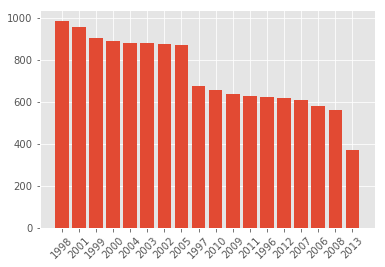

In [124]:
imls_by_year = imls["Fiscal_year"].value_counts().to_dict()
len(imls_by_year.values())
plt.bar(np.arange(18),imls_by_year.values())
plt.xticks(np.arange(18),imls_by_year.keys(),rotation=45)

#imls_by_year.plot(kind="bar",alpha=0.6,color='red',title='Types of Grants Supported by IMLS')

(array([ 1992.5,  1995. ,  1997.5,  2000. ,  2002.5,  2005. ,  2007.5,
         2010. ,  2012.5,  2015. ]), <a list of 10 Text xticklabel objects>)

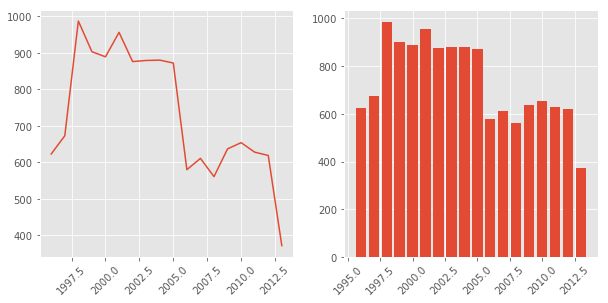

In [135]:
plt.rcParams['figure.figsize']= 10,10
lists=sorted(imls_by_year.items())
x,y=zip(*lists)
plt.subplot(2,2,1)
plt.plot(x,y)
plt.xticks(rotation=45)

plt.subplot(2,2,2)
plt.bar(x,y)
plt.xticks(rotation=45)


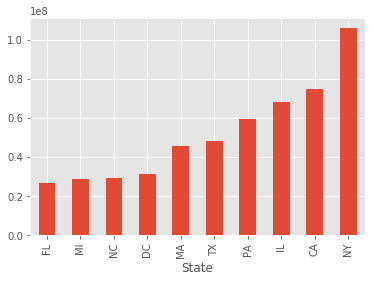

In [91]:
imls.groupby("State").Award_total.sum().sort_values().tail(10).plot(kind='bar')

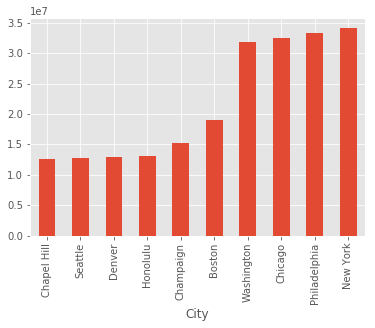

In [92]:
imls.groupby("City").Award_total.sum().sort_values().tail(10).plot(kind='bar')

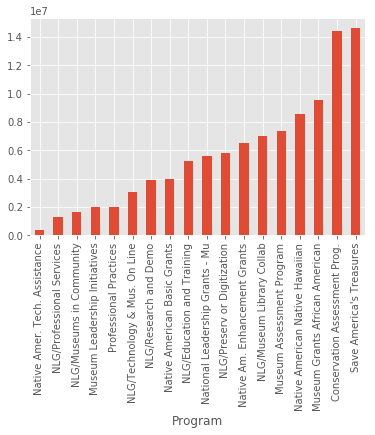

In [93]:
imls.groupby("Program").Award_total.sum().sort_values().head(18).plot(kind="bar")

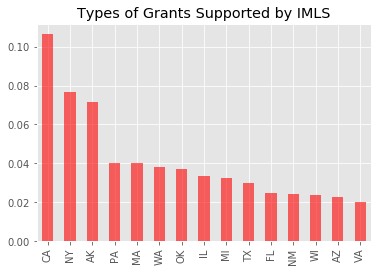

In [94]:
imls.State.value_counts(normalize=True).head(15).plot(kind="bar",alpha=0.6,color='red',title='Types of Grants Supported by IMLS')                                                    

In [95]:
widgets.IntSlider(
    value = 100,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='i',
    slider_color='white'
)

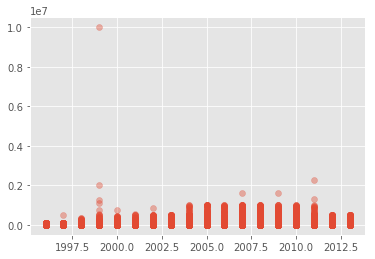

In [96]:
x = imls["Fiscal_year"]
y =imls["Award_total"]
plt.scatter(x, y, alpha=0.4)

In [97]:
#For Interactive Visulisation
class Dataset:
    def __init__(self, data):
        self.data = data.copy()
        
        def filter_eq(self, column, value):
            good = (self.data[column] == value)
            new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)

KeyError: 'FIPSCounty'